In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Alterando o estilo padrão dos gráficos
plt.style.use('ggplot')

# Análise Exploratória
Neste notebook irei realizar uma exploração nos dados, buscando entender distribuições e relacionamentos entre as variáveis. Além disso, buscarei formular e responder questões que seriam de interesse do negócio.

### Sobre os dados
Três tabelas foram fornecidas pelo cliente, onde:
- Vendas: dados de vendas.
- Sensor_storage_temperature: dados IoT dos sensores de temperatura da instalação de armazenamento onde os produtos estão.
- Sensor_stock_levels: níveis estimados de estoque de produtos com base em sensores IoT.

A exploração irá ser focada na tabela de vendas, pois as outras duas possuem apenas dados dos sensores, como temperatura e porcentagem de estoque. Entretanto, irei verificar o missing em cada uma delas.

In [26]:
# Lendos os dados
df_vendas = pd.read_csv('../data/raw/sales.csv', index_col=0)

In [27]:
# Obtendo uma visão inicial dos dados
df_vendas.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [28]:
# Checando a info
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


### Quantas transações foram realizadas?

In [29]:
print(f"Houveram {len(df_vendas.transaction_id.unique())} compras únicas")

Houveram 7829 compras únicas


### Quais os tipos de clientes? Quais os mais frequentes?

In [30]:
print(f"Possuimos {len(df_vendas.customer_type.unique())} categorias de clientes, sendo elas: {df_vendas.customer_type.unique()}")

Possuimos 5 categorias de clientes, sendo elas: ['gold' 'standard' 'premium' 'basic' 'non-member']


Text(0.5, 1.0, 'Qtd de clientes por categoria')

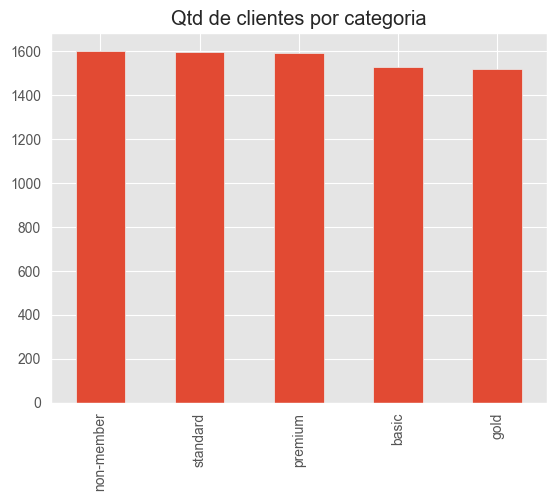

In [31]:
df_vendas.drop_duplicates(subset='transaction_id').customer_type.value_counts().plot(kind='bar')
plt.title('Qtd de clientes por categoria')

In [32]:
categorias_assinaturas = ['standard', 'premium', 'basic', 'gold']
df_vendas.query(f"customer_type == {categorias_assinaturas}").shape[0] / len(df_vendas)
print(f"Cerca de {round(df_vendas.query(f'customer_type == {categorias_assinaturas}').shape[0] / len(df_vendas) * 100, 2)}% dos clientes possuem algum tipo de assinatura")

Cerca de 79.55% dos clientes possuem algum tipo de assinatura


### Quais os tipos de pagamento que aceitamos? Quais os mais utilizados?

In [33]:
print(f"Aceitamos {len(df_vendas.payment_type.unique())} tipos de pagamento, sendo eles: {df_vendas.payment_type.unique()}")

Aceitamos 4 tipos de pagamento, sendo eles: ['e-wallet' 'debit card' 'cash' 'credit card']


Text(0.5, 1.0, 'Tipos de pagamento mais utilizados')

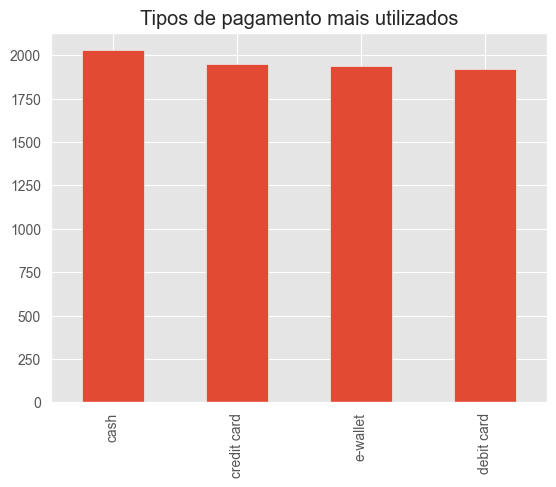

In [34]:
df_vendas.payment_type.value_counts().plot(kind = 'bar')
plt.title('Tipos de pagamento mais utilizados')

### Quais as categorias de produtos com que trabalhamos? Quais as que mais vendem?

Possuímos 22 categorias de produtos, sendo elas: ['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']


Text(0.5, 1.0, 'Tipos de produtos mais vendidos')

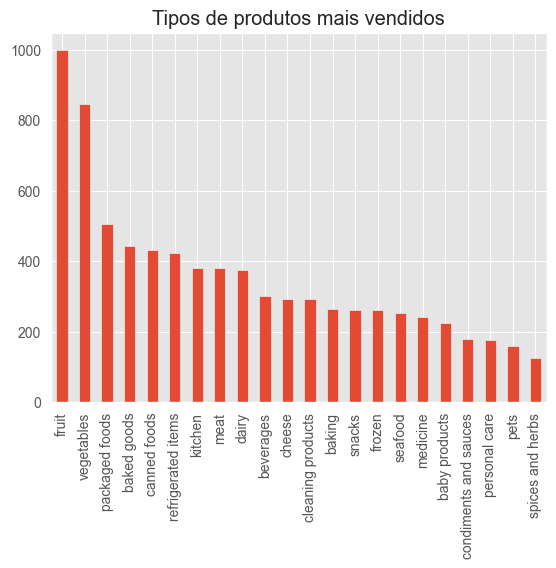

In [35]:
print(f"Possuímos {len(df_vendas.category.unique())} categorias de produtos, sendo elas: {df_vendas.category.unique()}")
df_vendas.category.value_counts().plot(kind='bar')
plt.title('Tipos de produtos mais vendidos')

### Qual a distribuição dos preços? E das compras realizadas?

Text(0.5, 0, 'Preço')

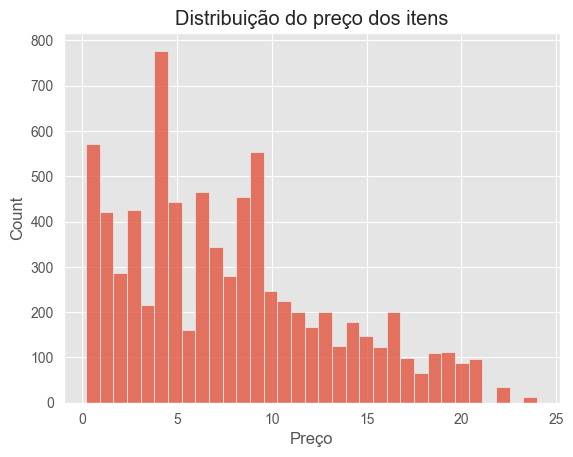

In [36]:
# Verificando a distribuição
sns.histplot(df_vendas.unit_price)
plt.title('Distribuição do preço dos itens')
plt.xlabel('Preço')

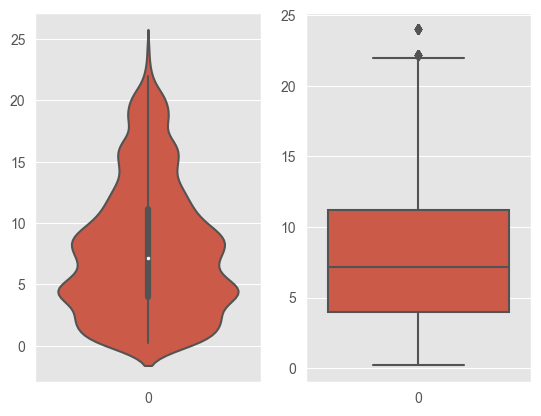

In [37]:
# Verificando a distribuição
fig, axes = plt.subplots(1, 2)
axes[0] = sns.violinplot(df_vendas.unit_price, ax=axes[0])
axes[1] = sns.boxplot(df_vendas.unit_price, ax=axes[1])

In [38]:
print(f"Em média, um cliente gasta {df_vendas.groupby('transaction_id')['total'].sum().mean()} dólares em produtos,\
 em contrapartida, a mediana é de {df_vendas.groupby('transaction_id')['total'].sum().median()} dólares.")

Em média, um cliente gasta 19.70990547962703 dólares em produtos, em contrapartida, a mediana é de 14.97 dólares.


Text(0.5, 1.0, 'Distribuição da qtd gasta por transação')

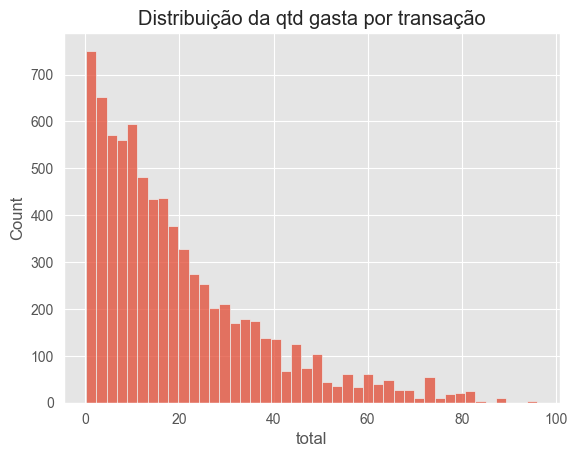

In [39]:
# Distribuição do valor das transações
sns.histplot(df_vendas.groupby('transaction_id')['total'].sum())
plt.title('Distribuição da qtd gasta por transação')

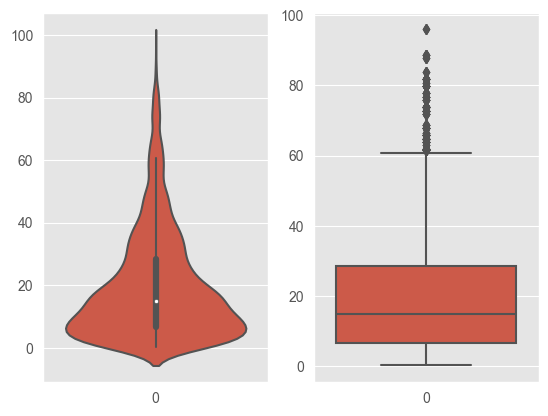

In [40]:
# Verificando a distribuição
fig, axes = plt.subplots(1, 2)
axes[0] = sns.violinplot(df_vendas.total, ax=axes[0])
axes[1] = sns.boxplot(df_vendas.total, ax=axes[1])

### Qual a menor quantidade de itens comprados em uma transação? E a maior? Qual a média?

In [41]:
print(f"Em média, as compras possuem {df_vendas.groupby('transaction_id')['quantity'].sum().mean()} itens.")
print(f"Na menor compra, {df_vendas.groupby('transaction_id')['quantity'].sum().min()} item foi levado.")
print(f"Na maior compra, {df_vendas.groupby('transaction_id')['quantity'].sum().max()} itens foram levados.")

Em média, as compras possuem 2.501596627921829 itens.
Na menor compra, 1 item foi levado.
Na maior compra, 4 itens foram levados.


Text(0.5, 0, 'Qtd itens')

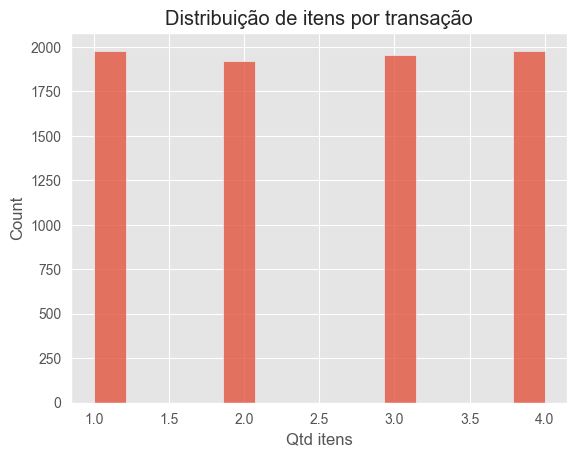

In [42]:
# Verificando a distribuição
sns.histplot(df_vendas.groupby('transaction_id').quantity.sum())
plt.title('Distribuição de itens por transação')
plt.xlabel('Qtd itens')

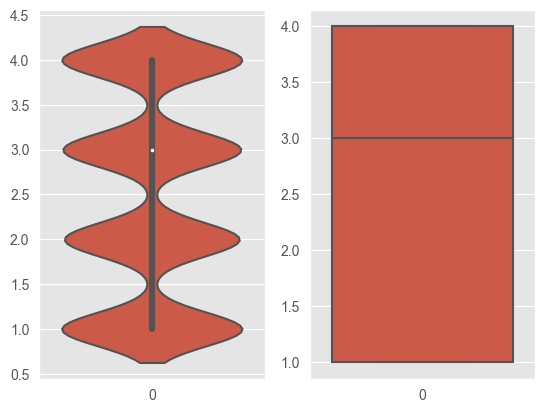

In [43]:
# Verificando a distribuição
fig, axes = plt.subplots(1, 2)
axes[0] = sns.violinplot(df_vendas.quantity, ax=axes[0])
axes[1] = sns.boxplot(df_vendas.quantity, ax=axes[1])

### Qual o total arrecadado por categoria de produto?


Text(0.5, 1.0, 'Arrecadação por categoria')

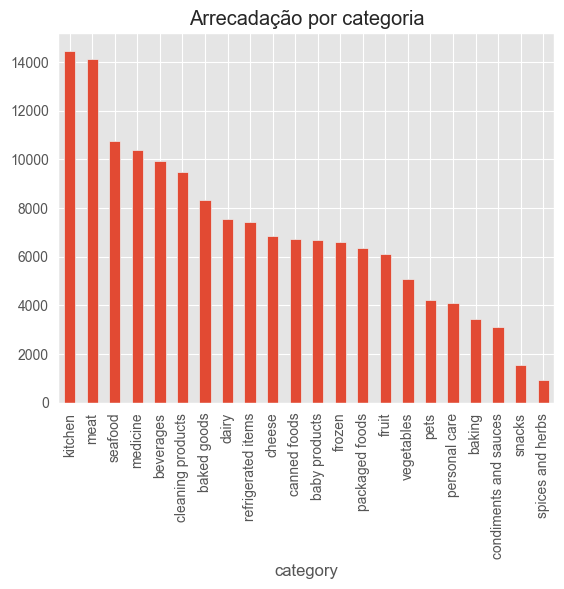

In [44]:
df_vendas.groupby('category').total.sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Arrecadação por categoria')

### Qual o total arrecadado por tipo de consumidor?

In [47]:
ordered_data = df_vendas.groupby('customer_type').total.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Arrecadação por tipo de consumidor')

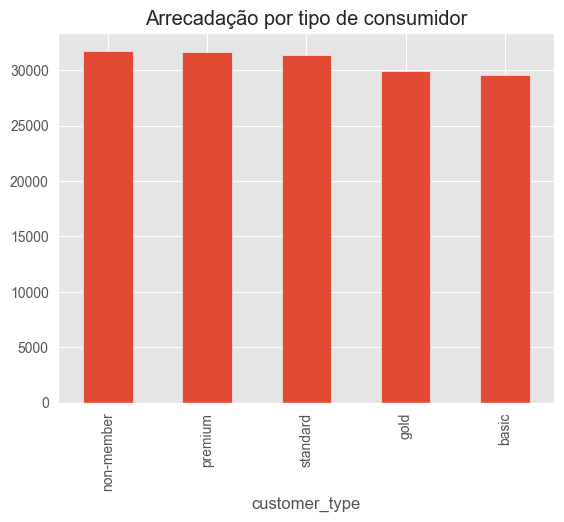

In [48]:
df_vendas.groupby('customer_type').total.sum().sort_values(ascending=False).plot(kind = 'bar')
plt.title('Arrecadação por tipo de consumidor')

### Verificando a distribuição dos outros datasets

In [49]:
# Lendo os dados
df_temperatura = pd.read_csv('../data/raw/sensor_storage_temperature.csv', index_col=0)
df_level_estoque = pd.read_csv('../data/raw/sensor_stock_levels.csv', index_col=0)

<Axes: ylabel='Frequency'>

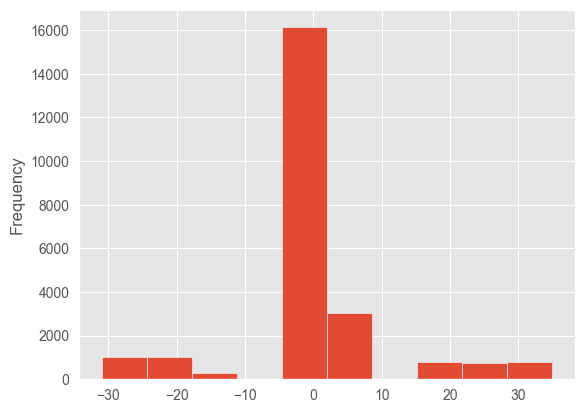

In [50]:
# Verificando a distribuição
df_temperatura.temperature.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

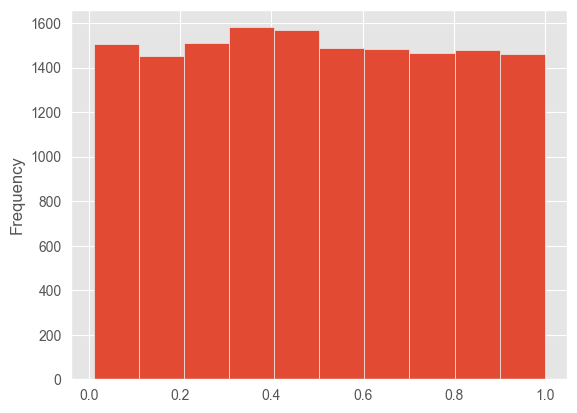

In [51]:
# Verificando a distribuição
df_level_estoque.estimated_stock_pct.plot(kind = 'hist')

## Checando o missing

In [52]:
df_vendas.isna().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [53]:
df_level_estoque.isna().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

In [54]:
df_temperatura.isna().sum()

id             0
timestamp      0
temperature    0
dtype: int64